In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, auc

y_true = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1])
y_prob = np.array([0.1, 0.4, 0.35, 0.8, 0.9, 0.99, 0.2, 0.6, 0.5, 0.45])

[0 0 0 1 1 1 0 1 0 0]


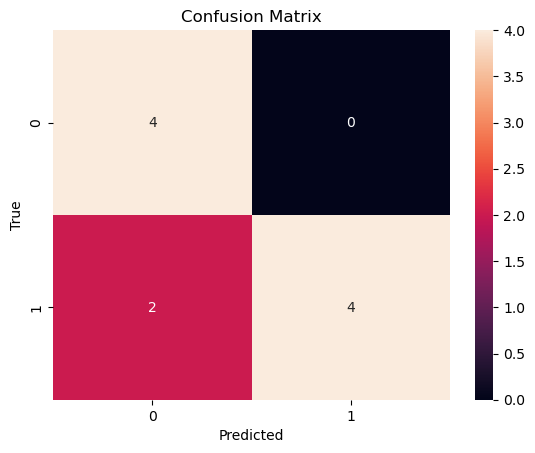

True positive:  4
False positive:  0
False negative:  2
True negative:  4
True Positive Rate:  0.6666666666666666
False Positive Rate:  0.0


In [13]:
# We can try different thresholds and check how the confusion_matrix goes to change
y_pred = np.where(y_prob >= 0.6, 1, 0)

print(y_pred)

cmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
sn.heatmap(cmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

tp = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 1]); print('True positive: ', tp) # tp 
fp = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 1]); print('False positive: ', fp) # fp
fn = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 0]); print('False negative: ', fn) # fn
tn = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 0]); print('True negative: ', tn) # tn

# We can obtain the TPR and FPR
print('True Positive Rate: ', tp / (tp + fn))
print('False Positive Rate: ', fp / (fp + tn))


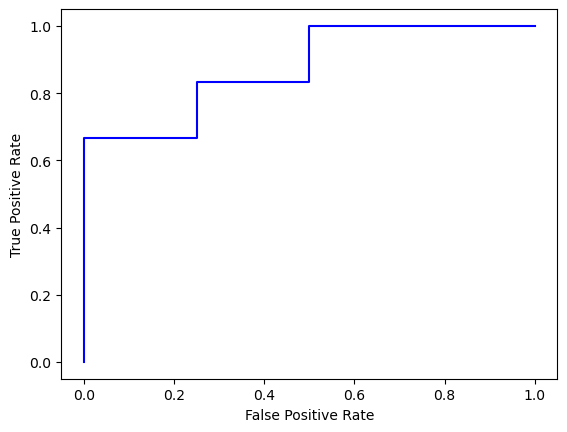

In [14]:
# We can obtain the values for our roc curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob, pos_label=1)
plt.plot(fpr,tpr,'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

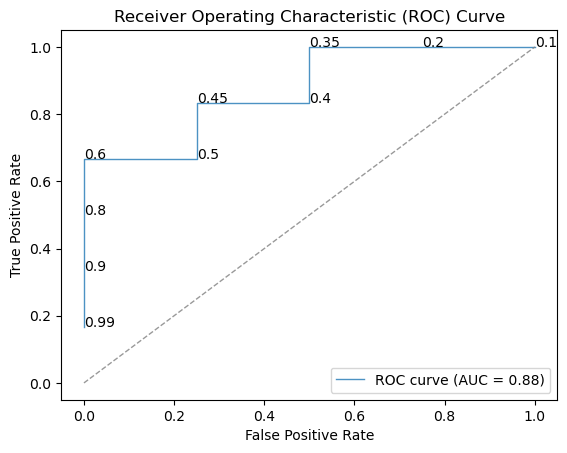

In [16]:
# We can do the same manually
y_true = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1])
y_prob= np.array([0.1, 0.4, 0.35, 0.8, 0.9, 0.99, 0.2, 0.6, 0.5, 0.45])

# Run through the different thresholds
thresholds = np.sort(y_prob)[::-1]
fpr = []
tpr = []
for threshold in thresholds:
    y_pred = [1 if prob >= threshold else 0 for prob in y_prob]
    tp = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 1]) # tp
    fp = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 1]) # fp
    fn = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 0]) # fn
    tn = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 0]) # tn
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))

# Also we can get the AUC -> Area under the curve
#roc_auc = np.trapz(tpr, fpr)
roc_auc = auc(fpr,tpr)

# Plot our ROC and a straight diagonal line
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Add the value of each point in the plot
for ind, point in enumerate(thresholds):
    plt.annotate(point,(fpr[ind], tpr[ind]))
plt.show()

In [7]:
# Why this is important?

#  Takes this example: the class of point_1 is equal to 1 (this is the real class)
point_1 = 1
# If my prediction for this point is 0.9, my model has a great confidence the class of that point should be 1
pred_point_1 = 0.9 # --> 1
# If my prediction for this point is 0.1, my model has a great confidence the class of that point should be 0
pred_point_1 = 0.1 # --> 0
# What happen if my value is around in the middle? --> My model is not ensure about that class. These are my complicated cases. 
# This corresponds to the cases that appears in the top-left corner in our graph.
pred_point_1 = 0.52 

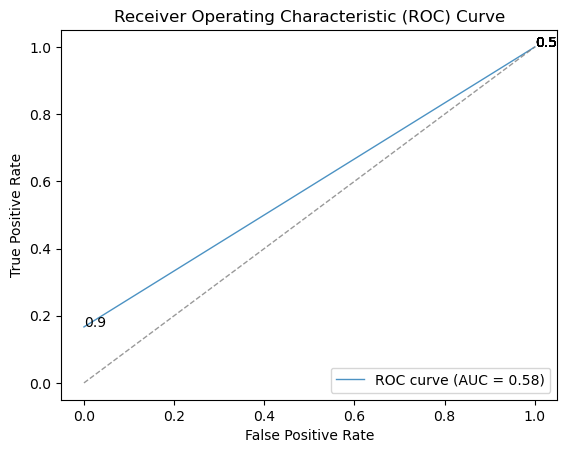

In [17]:
# What should happen if all my predictions are around 0.5?
y_true = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1])
y_prob= np.array([0.5,0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.9])

# Run through the different thresholds
thresholds = np.sort(y_prob)[::-1]
fpr = []
tpr = []
for threshold in thresholds:
    y_pred = [1 if prob >= threshold else 0 for prob in y_prob]
    tp = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 1]) # tp 
    fp = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 1]) # fp
    fn = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 0]) # fn
    tn = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 0]) # tn
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))

# Get the AUC
roc_auc = auc(fpr,tpr)

# Plot our ROC and a straight diagonal line
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Add the value of each point in the plot
for ind, point in enumerate(thresholds):
    plt.annotate(point,(fpr[ind], tpr[ind]))
plt.show()

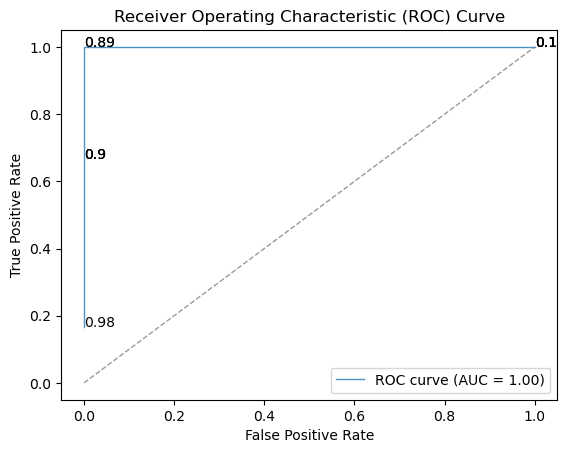

In [18]:
# What should happen in a very perfect case?
y_true = np.array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1])
y_prob= np.array([0.1,0.1, 0.9, 0.89, 0.89, 0.9, 0.1, 0.98, 0.1, 0.9])

# Run through the different thresholds
thresholds = np.sort(y_prob)[::-1]
fpr = []
tpr = []
for threshold in thresholds:
    y_pred = [1 if prob >= threshold else 0 for prob in y_prob]
    tp = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 1]) # tp 
    fp = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 1]) # fp
    fn = sum([1 for i in range(len(y_true)) if y_true[i] == 1 and y_pred[i] == 0]) # fn
    tn = sum([1 for i in range(len(y_true)) if y_true[i] == 0 and y_pred[i] == 0]) # tn
    fpr.append(fp / (fp + tn))
    tpr.append(tp / (tp + fn))

# Get the AUC
roc_auc = auc(fpr,tpr)

# Plot our ROC and a straight diagonal line
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Add the value of each point in the plot
for ind, point in enumerate(thresholds):
    plt.annotate(point,(fpr[ind], tpr[ind]))
plt.show()

